In [1]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py

File ‘colab_pdf.py’ already there; not retrieving.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp '/content/drive/MyDrive/Colab Notebooks/Copy of intro_to_recommenders_slides.ipynb' ./

In [4]:
from colab_pdf import colab_pdf
colab_pdf('Copy of intro_to_recommenders_slides.ipynb')





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of promptin

'File Download Unsuccessful. Saved in Google Drive'

# How to Build a Recommeder System from Scratch

This tutorials explore different types of recommendation systems and their implementations. Topics include:

- collaborative vs. content-based filtering
- implicit vs. explicit feedback
- handling the cold start problem
- recommendation model evaluation

We will build various recommendation systems using data from the [MovieLens](https://movielens.org/) database. You will need Jupyter Lab to run the notebooks for each part of this series. 

# Agenda

1. What is a recommender system? 
1. Why do we need recommender systems?
1. How does it work?
1. Collaborative Filtering
1. Content-based Filtering 
1. Tutorial using MovieLens dataset

# What is a Recommender System?

- an application of machine learning
- predicts a user's preference towards a given item
- aims to drive user engagement

<h1 style="text-align:center">Examples of Recommenders</h1>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/amazon-example.png" style="display:block;margin-left:auto;margin-right:auto;">



<h1 style="text-align:center">Examples of Recommenders</h1>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/netflix-example.png" style="display:block;margin-left:auto;margin-right:auto;">

<h1 style="text-align:center">Examples of Recommenders</h1>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/medium-example.png" style="display:block;margin-left:auto;margin-right:auto;">

<h1 style="text-align:center">Why Do We Need Recommender Systems?</h1>

<h3 style="text-align:center"> Before e-Commerce...</h3>

<p style="text-align:center"> Things were sold exclusively in brick-and-mortar stores </p>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/bookstore.png" style="display:block;margin-left:auto;margin-right:auto;"/>

<p style="text-align:center"> limited inventory </p>
<p style="text-align:center"> mainstream products </p>


<h1 style="text-align:center">Why Do We Need Recommender Systems?</h1>

<h3 style="text-align:center"> e-Commerce...</h3>

<p style="text-align:center"> Introduction of the online marketplace </p>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/amazon-ecommerce.png" style="display:block;margin-left:auto;margin-right:auto;width:50%;"/>

<p style="text-align:center"> unlimited inventory </p>
<p style="text-align:center"> niche products </p>


<h1 style="text-align:center">Why Do We Need Recommender Systems?</h1>


> "With the evolution of online retail, however, has come the revelation that being able to recategorize and rearrange products on the fly unlocks their real value." - Chris Anderson




<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/long-tail-book.png" style="display:block;margin-left:auto;margin-right:auto;width:35%;"/>

<h1 style="text-align:center">Why Do We Need Recommender Systems?</h1>

<p style="text-align:center;">The Tasting Booth Experiment (Iyengar and Lepper, 2000)</p>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/tasting-booth.png" style="display:block;margin-left:auto;margin-right:auto;width:65%;"/>



> "30% of the consumers in the limited-choice condition subsequently purchased a jar of jam; in contrast, only 3% of the consumers in the extensive-choice condition did so"



<h1 style="text-align:center">Recommender Systems = Machine Learning</h1>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/recommender-ml-1.png" style="display:block;margin-left:auto;margin-right:auto;"/>

<h1 style="text-align:center">Recommender Systems = Machine Learning</h1>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/recommender-ml-2.png" style="display:block;margin-left:auto;margin-right:auto;"/>

<h1 style="text-align:center">Recommender Systems = Machine Learning</h1>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/recommender-ml-3.png" style="display:block;margin-left:auto;margin-right:auto;"/>

<h1 style="text-align:center;">Recommender Systems = Machine Learning</h1>

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/recommender-ml-4.png" style="display:block;margin-left:auto;margin-right:auto;"/>

# Collaborative Filtering

- Based on the assumption that similar users like similar things
- "Customers who bought this item also bought..."
- "Because you watched Movie X..."

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/collaborative-filtering.png" style="display:block;margin-left:auto;margin-right:auto;width:60%"/>

<p style="text-align:center;">User-item ("utility") matrix</p>

# Content-based Filtering

- Generates recommendations using user and item features
- Handles the cold-start problem for new users and items
- User features: `age`, `gender`, `spoken language`
- Item features: `movie genre`, `year of release`, `cast`

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/content-based-filtering.png" style="display:block;margin-left:auto;margin-right:auto;width:90%"/>

# Tutorial

- Build an item-item recommender using the [MovieLens](https://movielens.org/) dataset 

# Step 1: Import Dependencies

<p style="margin-bottom:0;">We will be representing our data as a <b>Pandas DataFrame</b>.</p>

- a two-dimensional data structure
- `columns` represent features, `rows` represent items
- analogous to an Excel spreadsheet or SQL table
- documentation can be found here

In [5]:
# import required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Data

- Download the dataset from MovieLens [here](https://grouplens.org/datasets/movielens/)
- Consists of two files:
    - `ratings.csv`
    - `movies.csv`
- These files can also be accessed directly with these links:
    - https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv
    - https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv

### Ratings

<p style="margin-bottom:0;">Dataframe contains 4 columns:</p>

- `userId`
- `movieId`
- `rating` 
- `timestamp`

We need this data to perform collaborative filtering. 

In [6]:
# This is the way you load a data file from a URL
ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Movies

<p style="margin-bottom:0;">Dataframe contains 3 columns:</p>

- `movieId`
- `title`
- `genres`

We need this data to interpret the results of our collaborative filtering recommender.



In [7]:
# Again, you should be familiar with this way
movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")

movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


# Step 3: Exploratory Data Analysis

`Ratings` contains users' ratings for a given movie. Let's see how many ratings, unique movies, and unique users are in our dataset.

In [8]:
# Getting the numbers of ratings, movies, and users
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

In [9]:
print("Number of ratings: {}".format(n_ratings))
print("Number of unique movieId's: {}".format(n_movies))
print("Number of unique users: {}".format(n_users))
print("Average number of ratings per user: {}".format(round(n_ratings/n_users, 2)))
print("Average number of ratings per movie: {}".format(round(n_ratings/n_movies, 2)))

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


What can we learn about the dataset in general?
- It appears the dataset contains `100,836` ratings of `9,724` movies. These reviews are rated by 610 different reviewers.
- On average, each user provides `165.3` ratings in the dataset.
    + if the ratings per user is too __low__, the recommender system will not work very well. This dataset is fine.
- On average, each movie receives `10.37` ratings.
    + if the ratings per movie is too __low__, the recommender system will not work very well. This dataset is fine.

How many ratings did each user make? Let's use pandas' `groupby()` and `count()` to:

1. group the data by `userId's`
2. count the number of ratings for each `userId`.

In [10]:
# let's find out the number of rating per user
user_freq = ratings[['userId', 'movieId']].groupby('userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
# who are the top 5 reviewers?
user_freq.nlargest(n=5, columns='n_ratings')

,userId,n_ratings
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346


In [11]:
mean_n_ratings = user_freq['n_ratings'].std()
print("Standard deviation of the number of ratings for a given user: {}.".format(round(mean_n_ratings, 2)))

Standard deviation of the number of ratings for a given user: 269.48.


Let's visualize the distribution of movie ratings in this dataset, and distribution of user rating frequency. We can do this using a Python package called [seaborn](https://seaborn.pydata.org/).

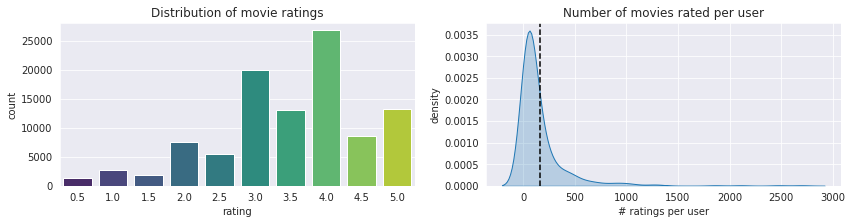

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,3))

# PLOT 1 - distribution of ratings
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=ratings, palette="viridis")
ax.set(title="Distribution of movie ratings")

# PLOT 2 - distribution of numbers of ratings
plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
ax.set(title="Number of movies rated per user", xlabel="# ratings per user", ylabel="density")
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.show()

### What are the highest and lowest rated movies? 

To find the "best" and "worst" movies, we need to calculate the mean rating for each movie in our dataset. We can do this by grouping by `movieId` and calculating the mean of the `rating` column.

In [13]:
# average rating per user
mean_rating = ratings.groupby('movieId')[['rating']].mean()
mean_rating.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


### What are the highest and lowest rated movies? 

In [14]:
lowest_rated = mean_rating['rating'].idxmin()
movies.loc[movies['movieId'] == lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [15]:
highest_rated = mean_rating['rating'].idxmax()
movies.loc[movies['movieId'] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


<img src="images/lamerica.png" align="right" width="15%"/>

### The highest rated movie is Lamerica?!

I'm sure that this movie is great but it doesn't sound like a familiar blockbuster. Let's dig deeper and see who rated this movie. 

In [16]:
# why Lamerica is the highest rating movie?
ratings.loc[ratings['movieId']==highest_rated]

,userId,movieId,rating,timestamp
13368,85,53,5.0,889468268
96115,603,53,5.0,963180003


While Lamerica may have the "highest" average rating, it only received 2 ratings. This isn't a good measure of a movie's popularity. The quality of a movie's rating depends not only on the average rating but also on the number of ratings. 

## Simple Recommenders

As described in the previous section, simple recommenders are basic systems that recommends the top items based on a certain metric or score. In this section, you will build a simplified clone of IMDB Top 250 Movies using metadata collected from IMDB.

The following are the steps involved:

- Decide on the metric or score to rate movies on.
- Calculate the score for every movie.
- Sort the movies based on the score and output the top results.

Before you perform any of the above steps, load your movies metadata dataset into a pandas DataFrame:

One of the most basic metrics you can think of is the **rating**. However, using this metric has a few *caveats*. For one, it does not take into consideration the **popularity** (which is very important) of a movie. Therefore, a movie with a rating of `9` from `10` voters will be considered `'better'` than a movie with a rating of `8.9` from `10,000` voters.

On a related note, this metric will also tend to favor movies with smaller number of voters with skewed and/or extremely high ratings. As the number of voters increase, the rating of a movie *regularizes* and approaches towards a value that is reflective of the movie's quality. It is more difficult to discern the quality of a movie with **extremely** few voters.

Taking these shortcomings into consideration, it is necessary that you come up with a **weighted rating** that takes into account the average rating and the number of votes it has garnered. Such a system will make sure that a movie with a `9` rating from `100,000` voters gets a (far) **higher** score than a YouTube Web Series with the same rating but a few hundred voters.


What you need to determine is an appropriate value for $m$, the minimum votes required to be listed in the chart. There is no right value for $m$. You can view it as a ***preliminary negative filter that ignores movies which have less than a certain number of votes***. The selectivity of your filter is up to your discretion (usually done in trial and error).

In this case, you will use the `90th` percentile as your cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least `90%` of the movies in the list. (On the other hand, if you had chosen the `75th` percentile, you would have considered the top `25%` of the movies in terms of the number of votes garnered. As the percentile decreases, the number of movies considered increases. Feel free to play with this value and observe the changes in your final chart).

As a first step, let's calculate the value of $r$, the mean rating across all movies:

In [17]:
# We should also utilize the mean of all the ratings in the dataset as `r`
r = mean_rating.mean() # r == 3.26
r

rating    3.262448
dtype: float64

The average rating of a movie in this dataset is around `3.26`, on a scale of `5`.

Next, let's calculate the number of votes, $n$, assuming we want movies received ratings in the `90th` quantile. `Pandas` makes this task extremely trivial using the `.quantile()` method of a pandas Series:

In [18]:
# Calculate the minimum number of votes required to be considered, `n`
# in this case, we want movies that received ratings in the top 10%
# getting the counts of ratings for each movie
rating_cnts = ratings['movieId'].value_counts()
n = rating_cnts.quantile(0.90)
n

27.0

Next, you can filter the movies that qualify for the chart, based on their vote counts:

In [19]:
# getting the qualified movie IDs
q_movieIds = rating_cnts[rating_cnts >= n].index
q_movieIds

Int64Index([   356,    318,    296,    593,   2571,    260,    480,    110,
               589,    527,
            ...
            102445,   5872,    880,   1021,   4343,   3252,    720,   1499,
              1120,  40629],
           dtype='int64', length=976)

In [20]:
q_movies = movies.loc[movies['movieId'].isin(q_movieIds)]
q_movies.shape

(976, 3)

In [21]:
movies.shape

(9742, 3)

## YOUR TURN HERE

Answer this question: how many movie have reviews more than 90% of the movies in the dataset?

976 movies out of the total 9,742 recieved ratings in the top 10% of movie counts.

# Bayesian Average

- A weighted average that accounts for how many ratings there are 
- Useful when there isn't much data available
- Used extensively in baseball statistics (i.e., batting average)
- Calculate with the following equation:

$$r_{i} = \frac{C \times m + \Sigma{\text{ratings}}}{C+N} $$

<p style="margin-bottom:0;">where:</p> 

- $C$ = our confidence (average number of ratings for a given movie)
- $m$ = our prior (global average rating)
- $N$ = total number of ratings for movie $i$

We first need to get the `count` and `mean` for each movie in our dataset. We can do this with a sophisticated `groupby` that applies both `mean` and `count` using the `agg` method.

In [22]:
# we need the count and average of the ratings on every movie
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()
movie_stats.head()

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


Let's calculate the Bayesian average. We first write a function that computes the Bayesian average for a given movie.

In [23]:
# now we need the average count of the ratings
C = movie_stats['count'].mean() # c == 165.3
# and the average rating of all movies
m = movie_stats['mean'].mean()

def bayesian_avg(ratings_i):
    bayesian_avg = (C*m+ratings_i.sum())/(C+ratings_i.count())
    return bayesian_avg

We can apply `bayesian_avg` to our entire ratings dataset using the `agg` method. 

In [24]:
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
bayesian_avg_ratings.head()

,movieId,bayesian_avg
0,1,3.890632
1,2,3.417227
2,3,3.260086
3,4,2.897612
4,5,3.104793


Which movies have the highest Bayesian average rating? 

In [25]:
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title
277,318,317,4.429022,4.392070,"Shawshank Redemption, The (1994)"
659,858,192,4.289062,4.236457,"Godfather, The (1972)"
2224,2959,218,4.272936,4.227052,Fight Club (1999)
224,260,251,4.231076,4.192646,Star Wars: Episode IV - A New Hope (1977)
46,50,204,4.237745,4.190567,"Usual Suspects, The (1995)"


Using Bayesian averages, we can see that Lamerica is no longer the top movie. 

Which movies have the lowest Bayesian average rating?

In [26]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
1172,1556,19,1.605263,2.190377,Speed 2: Cruise Control (1997)
2679,3593,19,1.657895,2.224426,Battlefield Earth (2000)
1372,1882,33,1.954545,2.267268,Godzilla (1998)
1144,1499,27,1.925926,2.296800,Anaconda (1997)
1988,2643,16,1.687500,2.306841,Superman IV: The Quest for Peace (1987)


# Do it yourself

In [27]:
# How about the top 5 movies by bayesian average?
# Let's find the genres for those top 5 movies based on their weighted average 
movies.loc[movies['title'].isin(["Shawshank Redemption, The (1994)","Godfather, The (1972)","Fight Club (1999)","Star Wars: Episode IV - A New Hope (1977)","Usual Suspects, The (1995)"])]

,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
659,858,"Godfather, The (1972)",Crime|Drama
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


* We see that the top 5 movies based on a weighted average of popularity (number of ratings accounted for) that the main genres **Crime** and **Action** are most popular.

In [28]:
movies['genres'].value_counts() # Most occuring genre in movies df is Drama, followed by Comedy.

Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: genres, Length: 951, dtype: int64

# Step 4: Transforming the Data

- Need to transform data into user-item matrix for collaborative filtering 
- [scipy.sparse_matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html): columns are movies and rows are users
- Each cell is populated with a user's rating towards a movie
- Empty cell = no rating available

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/utility-matrix.png" width=70%/>

In [29]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from the ratings dataframe.
    
    Args:
        df: ratings dataframe
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    N = df['userId'].nunique()
    M = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

In [30]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper =create_X(ratings)

### Calculating Sparsity of the Matrix

Let's see how sparse our matrix, $X$, is. We can calculate matrix density, $d$, with the following equation:

$d=\frac{\text{# non-zero elements}}{\text{total # elements}}$

In [31]:
density = X.count_nonzero()/(X.shape[0]*X.shape[1])

print("Matrix density: {}%".format(round(density*100,2)))

Matrix density: 1.7%


Only 1.7% of the matrix cells created have values.  This matrix is very sparse.

Wow, our matrix is quite sparse. But don't be discouraged! User-item matrices are typically very sparse. A general rule of thumb is that your matrix density should be no lower than 0.5% to generate decent results.

### How to save your sparse matrix

To save our sparse matrix for future analysis, we can use scipy's sparse matrix `save_npz` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.save_npz.html). 

In [32]:
from scipy.sparse import save_npz, load_npz
# you should change the path to `../ba545-data/user_item_matrix.npz`
save_npz("/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Week_6_Exercises/user_item_matrix.npz", X)

We can load it again using `load_npz`.

In [33]:
# again, you should change the path to `../ba545-data/user_item_matrix.npz`
X = load_npz('user_item_matrix.npz')
X

<9724x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

# Step 5: Finding similar movies using k-Nearest Neighbours

k-Nearest Neighbours (kNN) is a classification algorithm that predicts the label of a given sample based on majority vote of its nearest $k$ neighbours.

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/knn.png"/>

Distance between two samples can be measured using `cosine similarity`, `Euclidean distance`, `Manhattan distance`, etc. 

### Cosine Similarity vs. Euclidean Distance

- **Cosine Similarity**: measures similarity of two points in orientation (i.e., the cosine angle between $A$ and $B$)
    - the closer the cosine similarity is to 1, the more similar the items are

$$\text{similairity}=\frac{A \cdot B}{\mid{A}\mid\mid{B}\mid}$$

- **Euclidean Distance**: measures distance between two items in a n-dimensional space (i.e., measures straight line from $A$ to $B$)
    - unlike cosine similarity, Euclidean distance takes magnitude into account

$$d(p,q) = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2 + ... + (p_n-q_n)^2}$$

### Cosine Similarity vs. Euclidean Distance

<img src="https://raw.githubusercontent.com/fairfield-university-ba545/week5/master/images/cosine-sim.png" width="60%"/>

- A-B and D-E have the same cosine similarity
- A-B has a smaller Euclidean distance than D-E


Let's create a function that finds $k$ similair movies for a given movie. 

In [34]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Returns:
        list of k similar movie ID's
    """
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

We can test out our function by passing in a `movieId`. We'll create a dictionary that maps `movieId` to movie title so that we can better interpret our results.

In this case, `movie_id = 1` is Toy Story. We'll set `k = 10` and use our default metric, `cosine similarity`. This means that we're looking for the 10 most similar movies to Toy Story.

In [35]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1

similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles[movie_id]

print("Because you watched {}...".format(movie_title))
print("----------------------------------------------")
for i in similar_ids:
    print(movie_titles[i])

Because you watched Toy Story (1995)...
----------------------------------------------
Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Lion King, The (1994)
Star Wars: Episode VI - Return of the Jedi (1983)
Mission: Impossible (1996)
Groundhog Day (1993)
Back to the Future (1985)


Let's repeat the process but this time using Euclidean distance. 

In [36]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1
similar_ids = find_similar_movies(movie_id, X, k=10, metric="euclidean")

movie_title = movie_titles[movie_id]
print("Because you watched {}...".format(movie_title))
print("----------------------------------------------")
for i in similar_ids:
    print(movie_titles[i])

Because you watched Toy Story (1995)...
----------------------------------------------
Toy Story 2 (1999)
Mission: Impossible (1996)
Independence Day (a.k.a. ID4) (1996)
Bug's Life, A (1998)
Nutty Professor, The (1996)
Willy Wonka & the Chocolate Factory (1971)
Babe (1995)
Groundhog Day (1993)
Mask, The (1994)
Honey, I Shrunk the Kids (1989)


# Dimensionality Reduction with Matrix Factorization

### (Advanced)

### Matrix Factorization

- A linear algebra technique that can help discover latent features between users and movies
- Latent features give a more compact representation of user tastes and item descriptions
- Can enhance the quality of recommendations when $X$ is very sparse 
- Factorizes the user-item matrix into two "factor matrices":
    - user-factor matrix `(n_users, k)`
    - item-factor matrix `(k, n_items)`
    
<img src="https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/05/04/Factorization1.png"/>

### Singular Value Decomposition 

- Singular Value Decomposition (SVD) is a type of matrix factorization that is used for data reduction and de-noising 
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) has a class called `TruncatedSVD` that we can use to reduce our matrix from `(n_users, n_movies)` to `(n_users, n_components)` where `n_components` represents number of latent features. 

In [37]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=25, n_iter=10)
Z = svd.fit_transform(X.T)
print("The shape of our compressed Z matrix is: {}.".format(Z.shape))

The shape of our compressed Z matrix is: (610, 25).


Let's apply our `find_similar_movies` function to our new Z matrix. 

In [38]:
movie_id = 1
similar_movies = find_similar_movies(movie_id, X=Z.T, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print("Because you watched {}...".format(movie_title))
print("----------------------------------------------")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995)...
----------------------------------------------
Nixon (1995)
Casino (1995)
Assassins (1995)
Sudden Death (1995)
Powder (1995)
Balto (1995)
Tom and Huck (1995)
Father of the Bride Part II (1995)
Ace Ventura: When Nature Calls (1995)
Money Train (1995)


When we reduce the dimensions of our original user-item matrix to `(n_users, 30)`, we get the recommendations shown above. 

### Top N Recommender

- Matrix factorization allows us to predict missing ratings in our original $X$ matrix
- Reconstruct matrix by getting inner product of the user-factor matrix  and movie-factor matrix

In [39]:
new_X = svd.inverse_transform(Z).T

print("Dimensions of original user-item matrix: {}, {}".format(X.shape, type(X)))
print("Dimensions of SVD-reconstructed X matrix: {}, {}".format(new_X.shape, type(new_X)))

Dimensions of original user-item matrix: (9724, 610), <class 'scipy.sparse.csr.csr_matrix'>
Dimensions of SVD-reconstructed X matrix: (9724, 610), <class 'numpy.ndarray'>


Let's try generaing top N recommendations for a user in our dataset. We'll look at `userId` 5. Which movies did this user rate highly? 

In [40]:
userId = 5
user_preferences = ratings[(ratings['userId']==userId)&(ratings['rating']>=4)]
user_preferences = user_preferences.merge(movies[['movieId', 'title']])
user_preferences.sort_values('rating', ascending=False).head(5)

,userId,movieId,rating,timestamp,title
11,5,296,5.0,847434748,Pulp Fiction (1994)
8,5,247,5.0,847435337,Heavenly Creatures (1994)
21,5,595,5.0,847434832,Beauty and the Beast (1991)
20,5,594,5.0,847435238,Snow White and the Seven Dwarfs (1937)
19,5,590,5.0,847434747,Dances with Wolves (1990)


<p style="margin-bottom:30;">Now, let's predict which movies userId 5 will also like based on their previous ratings. We need to do the following:</p>

- get row from $X$ which represents userId=5
- sort their predicted ratings in descending order

We can use `np.argsort()` to grab top $N$ indices for `userId=5`.

In [41]:
top_N = 10

movie_titles = dict(zip(movies['movieId'], movies['title']))

top_N_indices = new_X[user_mapper[userId]].argsort()[-top_N:][::-1]


print("Top {} Recommendations for UserId {}:".format(top_N, userId))
for i in top_N_indices:
    movie_id = movie_inv_mapper[i]
    print(movie_titles[movie_id])

Top 10 Recommendations for UserId 5:
Puppet Masters, The (1994)
Heat (1995)
Beautiful Girls (1996)
Chasers (1994)
Timecop (1994)
Little Women (1994)
Birdcage, The (1996)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Sliver (1993)
Wallace & Gromit: A Close Shave (1995)


You see that your recommender has been successful in capturing more information due to more metadata and has given you (arguably) better recommendations. There are, of course, numerous ways of playing with this system in order to improve recommendations.

#### Some suggestions:

- Introduce a popularity filter: this recommender would take the list of the 30 most similar movies, calculate the weighted ratings (using the IMDB formula from above), sort movies based on this rating and return the top 10 movies.
- Other crew members: other crew member names, such as screenwriters and producers, could also be included.
- Increasing weight of the director: to give more weight to the director, he or she could be mentioned multiple times in the soup to increase the similarity scores of movies with the same director.

You can find these ideas implemented in [this notebook](https://github.com/rounakbanik/movies/blob/master/movies_recommender.ipynb).


## Collaborative Filtering with Python
In this tutorial, you have learnt how to build your very own **Simple** and **Content Based** Movie Recommender Systems. There is also another extremely popular type of recommender known as **collaborative filters**.

Collaborative filters can further be classified into two types:

- User-based Filtering

- Item-based Filtering

You will not be building these systems in this tutorial but you are already familiar with most of the ideas required to do so. A good place to start with collaborative filters is by examining the MovieLens dataset, which can be found [here](https://grouplens.org/datasets/movielens/).


## User-based Filtering

- User-based Filtering: these systems recommend products to a user that __similar users__ have liked. 
- For example, let's say Alice and Bob have a similar interest in books 
    - that is, they largely like and dislike the same books). 
- Now, let's say a new book has been launched into the market and Alice has read and loved it. 
- It is therefore, highly likely that Bob will like it too and therefore, the system recommends this book to Bob.


## Item-based Filtering

- Item-based Filtering: these systems are somewhat similar to the content recommendation engine that you built. 
- These systems identify __similar items__ based on how people have rated it in the past. 
- For example, if Alice, Bob and Eve have given 5 stars to The Lord of the Rings and The Hobbit, the system identifies the items as similar. 
- Therefore, if someone buys The Lord of the Rings, the system also recommends The Hobbit to him or her.


## Conclusion

You will not be building these systems in this tutorial but you are already familiar with most of the ideas required to do so. A good place to start with collaborative filters is by examining the MovieLens dataset, which can be found [here](https://grouplens.org/datasets/movielens/).

In this tutorial, you have covered how to build simple as well as content-based recommenders. Hopefully, you are now in a good position to make improvements on the basic systems you built and experiment with other kinds of recommenders (such as collaborative filters). I hope you had as much fun reading this as I had writing. Happy recommending!